In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras import metrics
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim


In [ ]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Check the shape of the data
print(X_train.shape)  # (60000, 28, 28)
print(X_test.shape)   # (10000, 28, 28)


(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# Formatting data for Keras
num_pixels = X_train.shape[1] * X_train.shape[2]  # 28*28 = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# Normalize pixel values to between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# Adding noise to images
noise_factor = 0.2
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

# Clip values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
# Create model
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

# Compile the model with additional metrics
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=[metrics.mean_squared_error, metrics.mean_absolute_error])

# Train the model and store training history
history = model.fit(x_train_noisy, X_train,
                    validation_data=(x_test_noisy, X_test),
                    epochs=10, batch_size=200, verbose=2)

C:\Users\18133\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 - 19s - 64ms/step - loss: 0.0418 - mean_absolute_error: 0.0955 - mean_squared_error: 0.0418 - val_loss: 0.0202 - val_mean_absolute_error: 0.0562 - val_mean_squared_error: 0.0202
Epoch 2/10
300/300 - 12s - 40ms/step - loss: 0.0166 - mean_absolute_error: 0.0483 - mean_squared_error: 0.0166 - val_loss: 0.0135 - val_mean_absolute_error: 0.0419 - val_mean_squared_error: 0.0135
Epoch 3/10
300/300 - 12s - 40ms/step - loss: 0.0127 - mean_absolute_error: 0.0401 - mean_squared_error: 0.0127 - val_loss: 0.0114 - val_mean_absolute_error: 0.0375 - val_mean_squared_error: 0.0114
Epoch 4/10
300/300 - 12s - 41ms/step - loss: 0.0108 - mean_absolute_error: 0.0361 - mean_squared_error: 0.0108 - val_loss: 0.0101 - val_mean_absolute_error: 0.0343 - val_mean_squared_error: 0.0101
Epoch 5/10
300/300 - 10s - 34ms/step - loss: 0.0097 - mean_absolute_error: 0.0337 - mean_squared_error: 0.0097 - val_loss: 0.0090 - val_mean_absolute_error: 0.0323 - val_mean_squared_error: 0.0090
Epoch 6/10
300/

In [ ]:
# Predict on noisy test images
pred = model.predict(x_test_noisy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [ ]:
# Reshape for visualization
X_test = np.reshape(X_test, (10000, 28, 28)) * 255
pred = np.reshape(pred, (10000, 28, 28)) * 255
x_test_noisy = np.reshape(x_test_noisy, (-1, 28, 28)) * 255

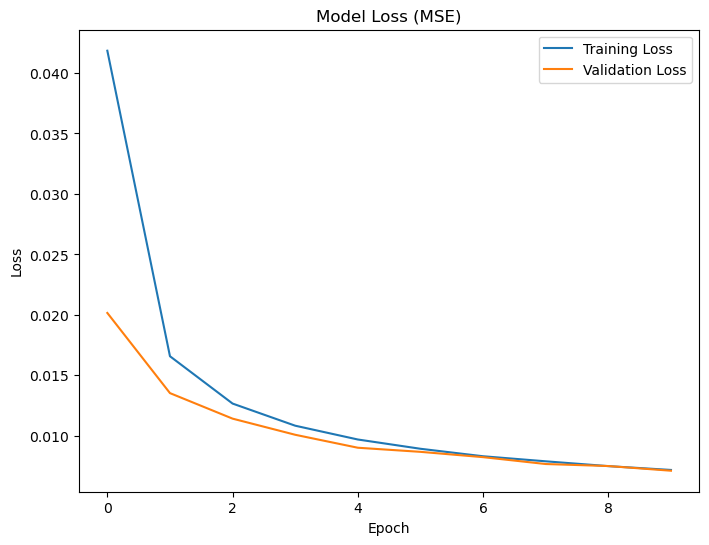

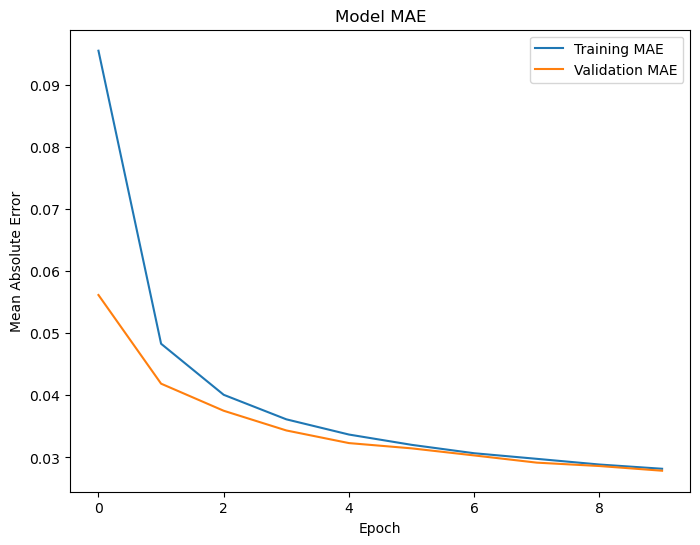

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (MSE)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot training & validation mean absolute error (MAE)
plt.figure(figsize=(8, 6))
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


Test Images


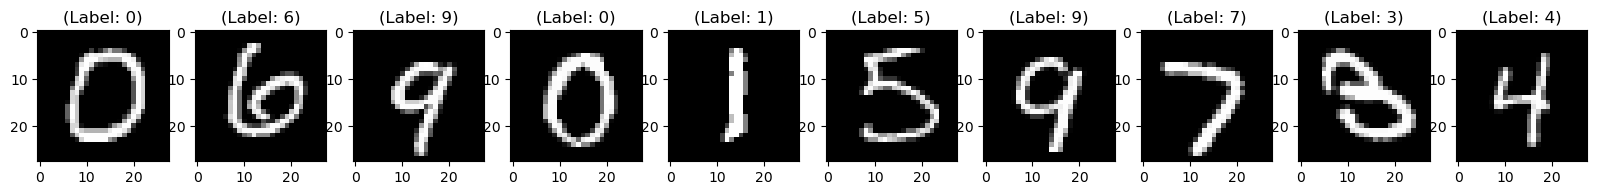

Test Images with Noise


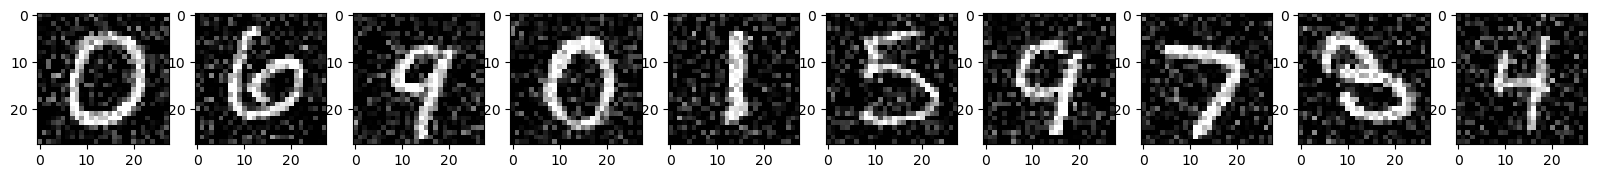

Reconstruction of Noisy Test Images


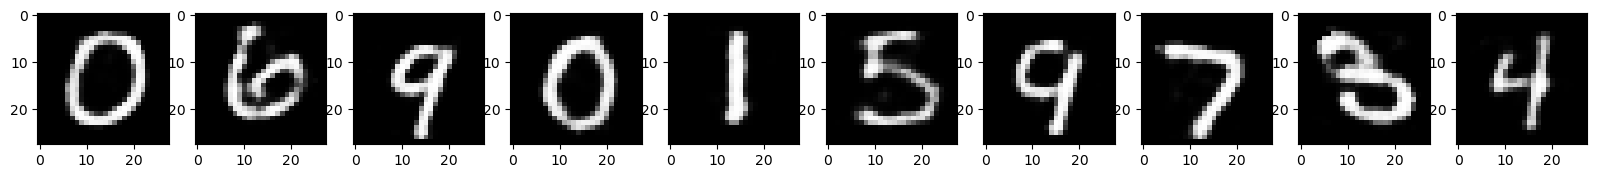

In [ ]:

# Plot original test images
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10, 20):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i, :, :], cmap='gray')
    curr_lbl = y_test[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()

# Plot noisy test images
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10, 20):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i, :, :], cmap='gray')
plt.show()

# Plot reconstructed (denoised) test images
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10, 20):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i, :, :], cmap='gray')
plt.show()